In [124]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [125]:
input_layer_size = 400  # 20x20 Input Images of Digits
hidden_layer_size = 25  # 25 hidden units
num_labels = 10         # 10 labels, from 1 to 10 (note that we have mapped "0" to label 10)

In [126]:
mat_data = sio.loadmat('ex3data1.mat')
X = mat_data['X']
y = mat_data['y'].ravel()
m, n = X.shape

In [127]:
def display_data(X, tile_width: int=-1, padding: int=0):
    """
    Display data in a nice grid

    Parameters
    ----------
    X : ndarray, shape (n_samples, sample_size)
        A collection of sample data to be displayed, where n_samples is the number of samples and sample_size is the
        size of each sample.
    tile_width : int
        Width of each image.
    padding : int
        Padding around the image.
    """
    m, n = X.shape

    if tile_width < 0:
        tile_width = int(np.round(np.sqrt(n)))
    tile_height = n / tile_width

    display_rows = int(np.floor(np.sqrt(m)))
    display_columns = int(np.ceil(m / display_rows))

    tile_height_padded = tile_height + padding * 2
    tile_width_padded = tile_width + padding * 2
    data = np.zeros((int(display_rows) * int(tile_height_padded), int(display_columns) * int(tile_width_padded)))

    for i in range(display_rows):
        for j in range(display_columns):
            tile = format_tile(X[i * display_rows + j,], tile_width, padding)
            tile = tile.T
            data[i * int(tile_height_padded):(i + 1) * int(tile_height_padded),j * int(tile_width_padded):(j + 1) * int(tile_width_padded)] = tile

    plt.imshow(data, cmap='gray', extent=[0, 1, 0, 1])


def format_tile(x, width: int=-1, padding: int=0):
    """
    Format raw data to a 2-d array for plot.

    Parameters
    ----------
    x : ndarray, shape (sample_size, )
        Sample data, 1-d array, where sample_size is the size of each sample.
    width : int
        Width of the image.
    padding : int
        Padding around the image.

    Returns
    -------
    ndarray
        The formatted 2-d array data for plot.
    """
    if width < 0:
        width = int(np.round(np.sqrt(len(x))))
    height = len(x) / width

    tile = np.ones((int(height + padding * 2), int(width + padding * 2)))

    for i in range(int(padding), int(height + padding)):
        tile[i, padding:(padding + width)] = x[((i - padding) * width):((i - padding) * width + width)]

    return tile


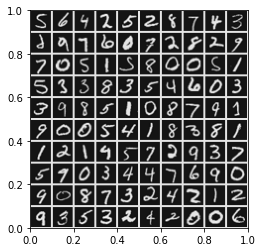

In [128]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[0:100], :]
plt.figure()
display_data(sel, padding=1)
plt.show()

In [129]:
mat_param = sio.loadmat('ex3weights.mat')
Theta_1 = mat_param['Theta1']
Theta_2 = mat_param['Theta2']

In [130]:
def predict(Theta_1, Theta_2, X):
    """
    Predict the label of an input given a trained neural network.

    Parameters
    ----------
    Theta_1 : ndarray
        Trained weights of layer 1 of the neural network.
    Theta_2 : ndarray
        Trained weights of layer 2 of the neural network.
    X : ndarray, shape (n_samples, n_features)
        Samples, where n_samples is the number of samples and n_features is the number of features.

    Returns
    -------
    p : ndarray, shape (n_samples,)
         The prediction for x.
    """

    m, n = X.shape
    X = np.hstack((np.ones((m, 1)), X))
    A_1 = sigmoid(X.dot(Theta_1.T))
    A_1 = np.hstack((np.ones((m, 1)), A_1))
    A_2 = sigmoid(A_1.dot(Theta_2.T))

    p = np.argmax(A_2, axis=1)
    p += 1  # The theta_1 and theta_2 are loaded from Matlab data, in which the matrix index starts from 1.

    return p


def sigmoid(z):
    """
    Compute sigmoid function.

    Parameters
    ----------
    z : array_like
        Variable for sigmoid function.

    Returns
    -------
    ndarray
        The sigmoid of each value of z.
    """
    g = 1 / (1 + np.exp(-z))
    return g

In [131]:
pred = predict(Theta_1, Theta_2, X)
print('Training Set Accuracy:', np.mean(pred == y) * 100)

Training Set Accuracy: 97.52


Displaying Example Image
Neural Network Prediction: [8] (digit [8])


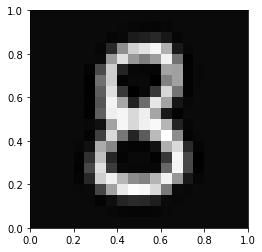

Displaying Example Image
Neural Network Prediction: [8] (digit [8])


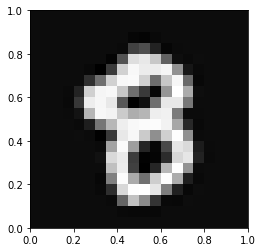

Displaying Example Image
Neural Network Prediction: [5] (digit [5])


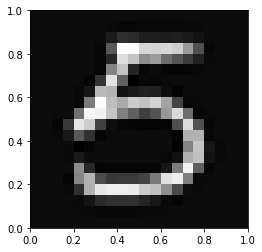

Displaying Example Image
Neural Network Prediction: [5] (digit [5])


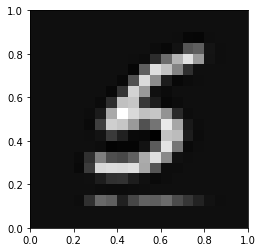

Displaying Example Image
Neural Network Prediction: [1] (digit [1])


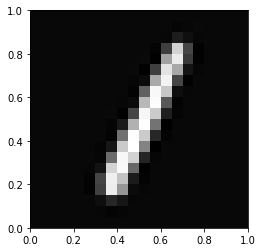

In [132]:
rp = np.random.permutation(m)
for i in range(5):
    print('Displaying Example Image')
    display_data(X[rp[i],].reshape(1, n))
    pred = predict(Theta_1, Theta_2, X[rp[i],].reshape(1, n))
    print('Neural Network Prediction: {} (digit {})'.format(pred, pred % 10))
    plt.show()